In [ ]:
import numpy as np #배열 라이브러리
import matplotlib.pyplot as plt

# sigmoid 함수
def sigmoid(s):
    return 1.0/(1.0 + np.exp(-s))

# 각 weight, bias 초기화 함수
def init_network(input_dim, hidden_dim, output_dim):
    W = np.random.randn(4, 2) #표준정규분포(평균 = 0, 분산1)를 따르는 난수
    b = np.random.randn(2)
    V = np.random.randn(hidden_dim, output_dim)
    c = np.random.randn(output_dim)
    return W, b, V, c

# hidden, ouput layer의 출력 함수
def forward(x, W, b, V, c):
    z = sigmoid(np.matmul(x, W) - b)
    y = sigmoid(np.matmul(z, V) - c)
    return z, y

def backward(x, true_y, W, b, V, c, lr=0.01):
    z, y = forward(x, W, b, V, c)
    delta_y = (y - true_y)*y*(1-y)
    delta_z = delta_y.dot(V.T)*z*(1-z)

    V = V - lr * np.matmul(z.T, delta_y)
    W = W - lr * np.matmul(x.T, delta_z)
    c = c - lr * np.sum(delta_y,axis=0)*(-1.)
    b = b - lr * np.sum(delta_z,axis=0)*(-1.)
    return W, b, V, c

epoch: 0/10000, error: 1.069
epoch: 1000/10000, error: 0.818
epoch: 2000/10000, error: 0.599
epoch: 3000/10000, error: 0.538
epoch: 4000/10000, error: 0.162
epoch: 5000/10000, error: 0.044
epoch: 6000/10000, error: 0.024
epoch: 7000/10000, error: 0.016
epoch: 8000/10000, error: 0.012
epoch: 9000/10000, error: 0.009


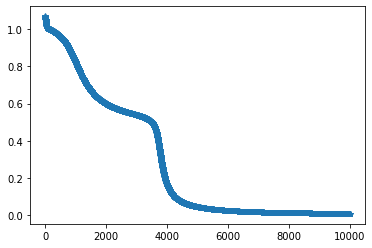

In [ ]:
x = np.array([[0,0], [0,1],[1,1],[1,1]])
true_y = np.array([[0.], [1.], [1.], [0.]])
epoch_num = 10000


W, b, V, c = init_network(input_dim=4, hidden_dim=2, output_dim=1)
#W = np.array([[1.,1.],[1.,1.]])
#b = np.array([0.5, 1.5])
#V = np.array([[1.],[-1.]])
#c = np.array([0.5])

epoch_dat = []
error_dat = []
for epoch in range (epoch_num):
    train_accuracy = 0;
    W, b, V, c = backward(x, true_y, W, b, V, c, lr=0.1)
    z, y = forward(x, W, b, V, c)
    error = y - true_y
    train_error = np.sum(error*error)
    epoch_dat.append(epoch)
    error_dat.append(train_error)

    if epoch % 1000 == 0:
        print( 'epoch: %d/%d, error: %.3f'%(epoch, epoch_num, train_error))

plt.plot(epoch_dat, error_dat, '-*')
plt.show()